In [3]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2

**Prediction evaluation (VCMPR@k and centralities)**

In [3]:
from utils.evaluation import read_prediction_files
seal = read_prediction_files("seal", "cora")

In [10]:
from utils.evaluation import evaluate_all
import networkx as nx
from functools import partial
from diffusion.jackson_metrics import diffusion_centrality, Godfather
eigen = partial(nx.eigenvector_centrality_numpy)
degree = partial(nx.degree_centrality)
diffusion = partial(diffusion_centrality, T=5)
Godfather = partial(Godfather)
names = ["eigenvector_centrality", 
         "degree_centrality", 
         "diffusion_centrality"]
methods = [eigen, degree, diffusion]

data_names = ["Cora"]
result, k_dict, metrics_dict = evaluate_all(model_name="seal", list_of_data=data_names, 
                      method_list=methods, 
                      method_names=names)

Cora:  80%|██████████████████████████████████████████████████████████████▍               | 8/10 [02:44<00:41, 20.62s/it]


In [11]:
k_dict

{'Cora': 1}

In [12]:
metrics_dict

{'Cora': {'AVG VCMPR@1': 0.5359418988227844}}

In [13]:
result[0]

,node_index,vcmpr_IB_min1,eigenvector_centrality_train,degree_centrality_train,diffusion_centrality_train,eigenvector_centrality_true,degree_centrality_true,diffusion_centrality_true,eigenvector_centrality_pred,degree_centrality_pred,diffusion_centrality_pred,dataset
0,0,1.0,3.718468e-03,0.442059,0.261023,4.795794e-03,0.606188,0.298852,9.187377e-03,0.599348,0.318241,Cora
1,2,0.0,6.115304e-02,0.884118,0.845381,5.555293e-02,1.010313,0.883428,6.521553e-02,1.123793,0.938553,Cora
2,4,0.0,2.925690e-01,1.105148,0.676003,2.754719e-01,1.010313,0.618225,2.755372e-01,0.998913,0.605778,Cora
3,5,0.0,4.688250e-02,0.663089,0.250965,4.198629e-02,0.606188,0.235516,4.068879e-02,0.799130,0.302955,Cora
4,8,1.0,4.711469e-03,0.221030,0.131200,1.867138e-02,0.606188,0.311205,2.295471e-02,0.599348,0.313827,Cora
...,...,...,...,...,...,...,...,...,...,...,...,...
1407,2695,1.0,-5.034830e-17,0.221030,0.074318,-4.780068e-17,0.404125,0.135245,3.908550e-17,0.399565,0.132400,Cora
1408,2696,0.0,5.234990e-17,0.221030,0.068954,4.682682e-05,0.202063,0.069029,1.853711e-03,0.224763,0.094225,Cora
1409,2697,1.0,-1.439018e-17,0.000000,0.000000,-4.286266e-18,0.202063,0.062329,3.169941e-17,0.000000,0.000000,Cora
1410,2701,0.0,6.964495e-17,0.442059,0.156311,-1.526523e-17,0.404125,0.140236,1.928480e-17,0.399565,0.137285,Cora


**Evaluate diffusion**

In [17]:
from utils.difffusion_evaluation import evaluate_all

data_names = ["facebook"]
result = evaluate_all(model_name="gcn",
                      list_of_data=data_names,
                      eval_type='s')


Running evaluations: 100%|████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.77it/s]


In [18]:
result[0].keys()

dict_keys(['true_si', 'pred_si', 'info_vulnerability', 'metrics'])

In [19]:
import pandas as pd

# Stack all DataFrames along a new axis, then calculate the mean across all files for each node
stacked_df = pd.concat(result[0]["info_vulnerability"], axis=0).groupby(level=0).mean()

# Calculate the mean error columns
stacked_df['vulnerability_error'] = stacked_df["true_vulnerability"] - stacked_df["pred_vulnerability"]
stacked_df['recency_error'] = stacked_df['true_recency'] - stacked_df['pred_recency']

# Display the resulting DataFrame
stacked_df

,true_vulnerability,true_recency,pred_vulnerability,pred_recency,degree,file,vulnerability_error,recency_error
0,0.644,0.081381,0.799,0.119759,347.0,4.5,-0.155,-0.038377
1,0.478,0.044942,0.627,0.073279,17.0,4.5,-0.149,-0.028337
2,0.264,0.022867,0.487,0.054446,10.0,4.5,-0.223,-0.031579
3,0.499,0.050002,0.665,0.076654,17.0,4.5,-0.166,-0.026652
4,0.130,0.013573,0.396,0.043241,10.0,4.5,-0.266,-0.029668
...,...,...,...,...,...,...,...,...
4034,0.003,0.000412,0.259,0.026856,2.0,4.5,-0.256,-0.026443
4035,0.002,0.000214,0.233,0.024952,1.0,4.5,-0.231,-0.024738
4036,0.005,0.001445,0.214,0.022420,2.0,4.5,-0.209,-0.020975
4037,0.009,0.002000,0.308,0.032851,4.0,4.5,-0.299,-0.030851


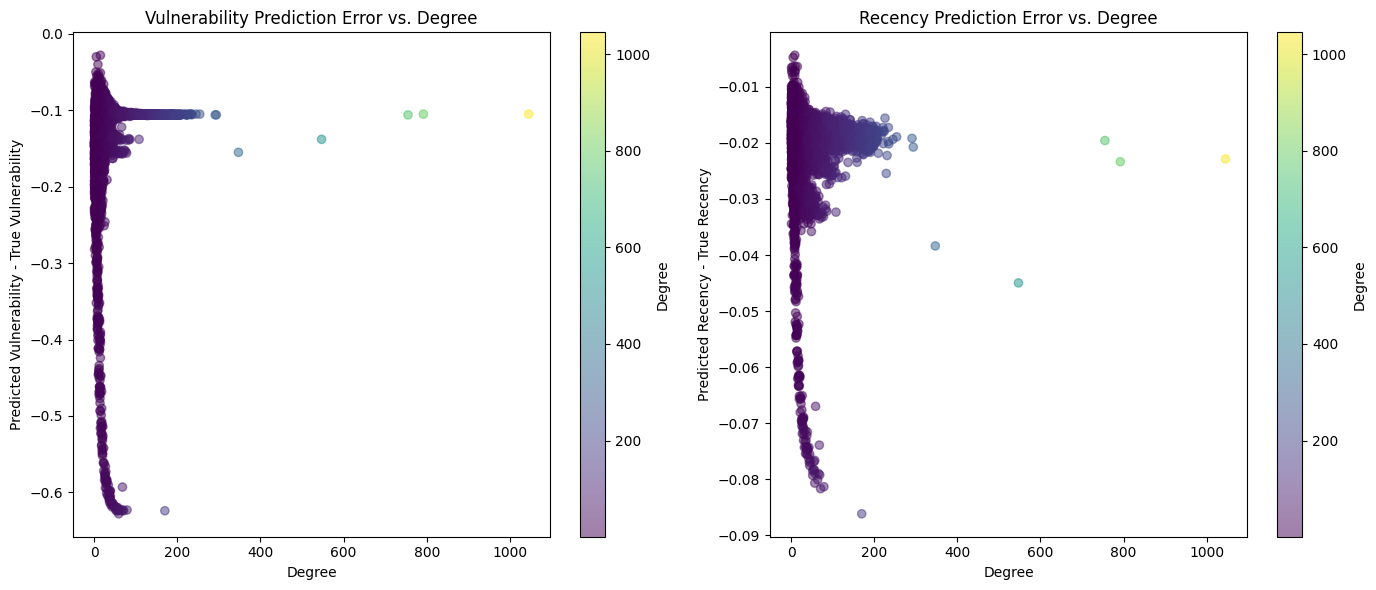

In [20]:
import matplotlib.pyplot as plt 

# Plotting prediction error for vulnerability vs degree
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(stacked_df['degree'], stacked_df['vulnerability_error'], alpha=0.5, c=stacked_df['degree'], cmap='viridis')
plt.colorbar(label='Degree')
plt.xlabel('Degree')
plt.ylabel('Predicted Vulnerability - True Vulnerability')
plt.title('Vulnerability Prediction Error vs. Degree')

# Plotting prediction error for recency vs degree
plt.subplot(1, 2, 2)
plt.scatter(stacked_df['degree'], stacked_df['recency_error'], alpha=0.5, c=stacked_df['degree'], cmap='viridis')
plt.colorbar(label='Degree')
plt.xlabel('Degree')
plt.ylabel('Predicted Recency - True Recency')
plt.title('Recency Prediction Error vs. Degree')

plt.tight_layout()
plt.show()